# Part C. Self-Taught Learning
In this part, you implement self-taught learning for Neural Network using the Autoencoder that provided in Activity 5.2 and a 3-layer NN (from Activity 5.1 or H2O package)

In [1]:
library(ggplot2)
library(h2o)
library(reshape2)

Warning message:
"package 'ggplot2' was built under R version 4.0.2"

----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more information visit https://docs.h2o.ai

----------------------------------------------------------------------



Attaching package: 'h2o'


The following objects are masked from 'package:stats':

    cor, sd, var


The following objects are masked from 'package:base':

    %*%, %in%, &&, ||, apply, as.factor, as.numeric, colnames,
    colnames<-, ifelse, is.character, is.factor, is.numeric, log,
    log10, log1p, log2, round, signif, trunc




# Question 3 [Self Taught Neural Network Learning, 30 Marks]

1. Load Task2C_labeled.csv, Task2C_unlabeled.csv and Task2C_test.csv data sets and required libraries (e.g., H2O). Note that we are going to use Task2C_labeled.csv and Task2C_unlabeled.csv for training the autoencoder. We are going to use Task2C_labeled.csv for training the classifier. Finally, we evaluate the trained classifier on the test Task2C_test.csv.

In [2]:
localH2O =  h2o.init(nthreads = -1, port = 54321, max_mem_size = '6G', startH2O = TRUE)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         14 hours 18 minutes 
    H2O cluster timezone:       Australia/Sydney 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.1.3 
    H2O cluster version age:    7 days, 3 hours and 22 minutes  
    H2O cluster name:           H2O_started_from_R_ClockworK_epa755 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   5.30 GB 
    H2O cluster total cores:    12 
    H2O cluster allowed cores:  12 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 4.0.1 (2020-06-06) 



In [3]:
labeled.frame = h2o.importFile(path = 'C:/Users/ClockworK/Desktop/machine\ learninig/Assignment\ 2/Dataset\ and\ Sample\ code/Task2C_labeled.csv' ,sep=',') 
unlabeled.frame = h2o.importFile(path = 'C:/Users/ClockworK/Desktop/machine\ learninig/Assignment\ 2/Dataset\ and\ Sample\ code/Task2C_unlabeled.csv' ,sep=',') 
test.frame = h2o.importFile(path = 'C:/Users/ClockworK/Desktop/machine\ learninig/Assignment\ 2/Dataset\ and\ Sample\ code/Task2C_test.csv' ,sep=',')

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [4]:
labeled.frame[,1] = as.factor(labeled.frame$label)
unlabeled.frame[,1] = NA
train.frame = h2o.rbind(labeled.frame[,-1], unlabeled.frame[,-1])
test.frame[,1] = as.factor(test.frame$label)

2. Train an autoencoder (similar to Activity 5.2) with only one hidden layer and change the number of its neurons to: 20, 40, 60, 80, …, 440 (i.e. from 20 to 440 with a step size of 20).

In [5]:
options(warn=-1)
Nunits = seq(20, 440, 20)

errors = data.frame("units"=Nunits, "train.error"=0, "test.error"=0)

for (units in Nunits) {
    # build a neural network classifier based on the labeled training data
    NN.model = h2o.deeplearning(  
      x = 2:ncol(test.frame), # select all pixels + extra features
      training_frame = train.frame, # specify the frame (imported file)    
      hidden = c(units), # number of layers and their units
      epochs = 25, # maximum number of epoches  
      activation = 'Tanh', # activation function 
      autoencoder = TRUE, # is it an autoencoder? Yes!
      l2 = 0.1
    )
    errors[units/20, "train.error"] = mean(h2o.anomaly(NN.model, train.frame))
    errors[units/20, "test.error"] = mean(h2o.anomaly(NN.model, test.frame))
}

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

3. For each model in Step II, calculate and record the reconstruction error which is simply the average (over all data points while the model is fixed) of Euclidian distances between the input and output of the autoencoder (you can simply use “h2o.anomaly()” function). Plot these values where the x-axis is the number of units in the middle layer and the y-axis is the reconstruction error. Then, save and attach the plot to your PDF report. Explain your findings based on the plot in your PDF report.

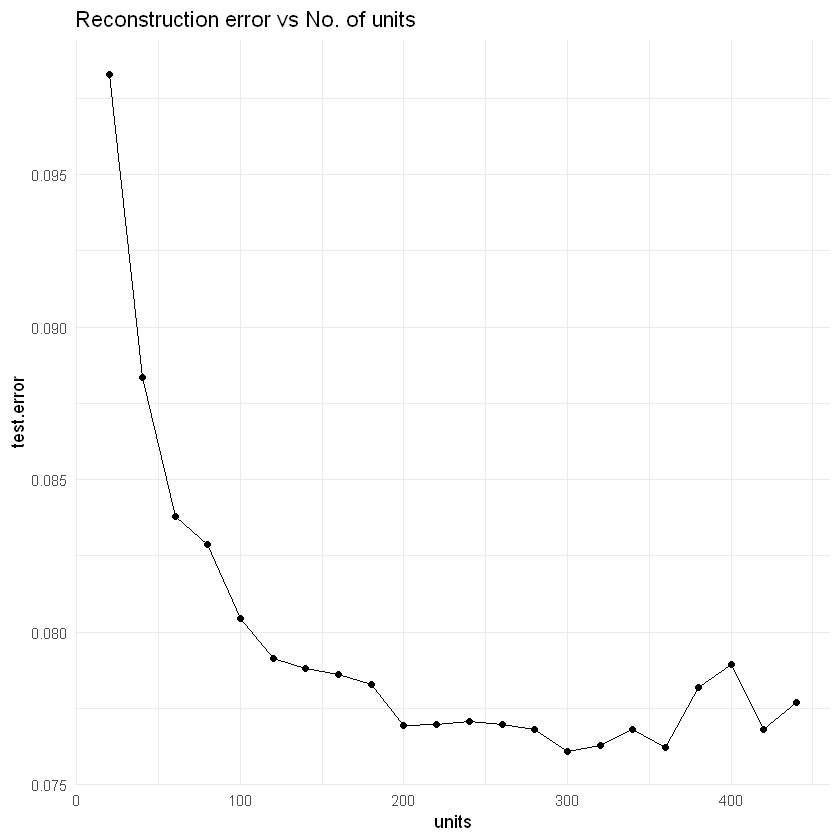

In [6]:
ggplot(data=errors, aes(x=units, y=test.error)) + 
    geom_line() + 
    geom_point() +
    ggtitle("Reconstruction error vs No. of units") +
    theme_minimal()

4. Build the 3-layer NN from Activity 5.1 or “h2o.deeplearning” function (make sure you set “ autoencoder = FALSE”) to build a classification model using all the original attributes from the training set and change the number of its neurons to: 20, 40, 60, 80, .., 440 like Step II. For each model, calculate and record the test error.

In [7]:
error.rate <- function(label, prediction){
    return (sum(label!=prediction)/nrow(label))
}

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'error.test' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. pas

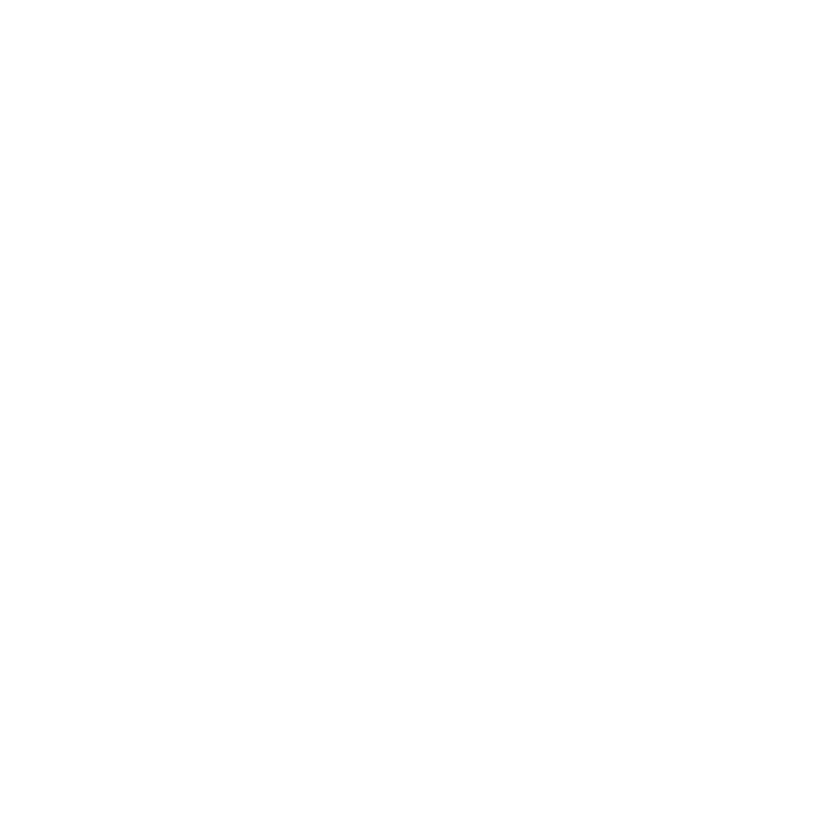

In [8]:
# build a neural network classifier based on the labeled training data
Nunits = seq(20, 440, 20)
cls_errors = data.frame("units"=Nunits, "error.orig.feats"=0, "error.add.feats"=0)

for (units in Nunits){
    NN.model <- h2o.deeplearning(    
      x = 2:ncol(labeled.frame), # select all pixels
      y = 1,
      training_frame = labeled.frame, # specify the frame (imported file)    
      hidden = c(units), # number of layers and their units
      epochs = 25, # maximum number of epoches  
      activation = 'Tanh', # activation function 
      autoencoder = FALSE, # is it an autoencoder? Yes!
      l2 = 0.1
    )
    
    cls_errors[units/20, "error.orig.feats"] = error.rate(test.frame$label, h2o.predict(NN.model, test.frame)$predict)
}

ggplot(data=cls_errors, aes(x=units, y=error.test)) + 
    geom_line() + 
    geom_point() +
    ylim(0.3, 1) +
    ggtitle("Test Error vs No. of units") +
    theme_minimal()

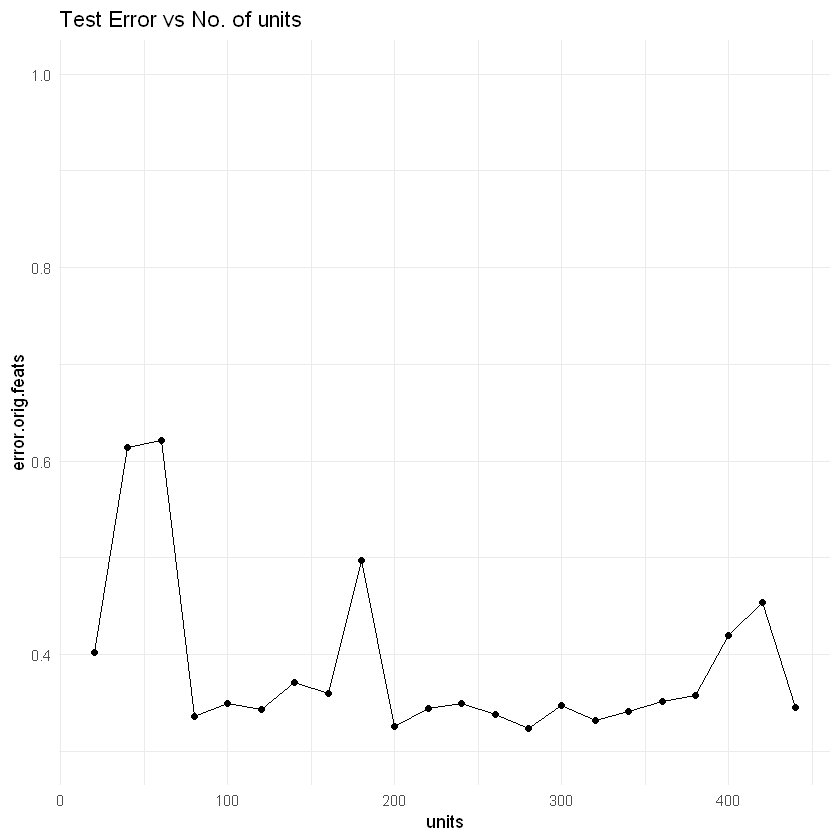

In [9]:
ggplot(data=cls_errors, aes(x=units, y=error.orig.feats)) + 
    geom_line() + 
    geom_point() +
    ylim(0.3, 1) +
    ggtitle("Test Error vs No. of units") +
    theme_minimal()

5. Build augmented self-taught networks using the models learnt in Step II. For each model:

    A. Add the output of the middle layer of an autoencoder as extra features to the original feature set.
    
    B. Train a 3-layer NN using all features (original + extra) and varying the number of hidden neurons (like Step IV) as well. Then calculate and record the test error.
    
    For example, each model should be developed as follows:
    
    Model 1: 20 hidden neurons + extra 20 features (from an autoencoder),
    
    Model 2: 40 hidden neurons + extra 40 features (from an autoencoder),
    
    ...,
    
    Model 22: 440 hidden neurons + extra 440 features (from an autoencoder).

In [10]:
Nunits = seq(20, 440, 20)

for (units in Nunits){
    
    NN.model = h2o.deeplearning(  
          x = 2:ncol(labeled.frame), # select all pixels + extra features
          training_frame = labeled.frame, # specify the frame (imported file)    
          hidden = c(units), # number of layers and their units
          epochs = 25, # maximum number of epoches  
          activation = 'Tanh', # activation function 
          autoencoder = TRUE, # is it an autoencoder? Yes!
          l2 = 0.01
        )
    
    feats = h2o.cbind(labeled.frame, h2o.deepfeatures(NN.model, labeled.frame, layer = 1))
    test.feats = h2o.cbind(test.frame, h2o.deepfeatures(NN.model, test.frame, layer = 1))
    
    NN.model = h2o.deeplearning(  
          x = 2:ncol(feats), # select all pixels + extra features
          y=1,
          training_frame = feats, # specify the frame (imported file)    
          hidden = c(units), # number of layers and their units
          epochs = 25, # maximum number of epoches  
          activation = 'Tanh', # activation function 
          autoencoder = FALSE, # is it an autoencoder? Yes!
          l2 = 0.01
        )
    
    cls_errors[units/20, "error.add.feats"] = error.rate(test.feats$label, h2o.predict(NN.model, test.feats)$predict)
    
}

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |=====================================

  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


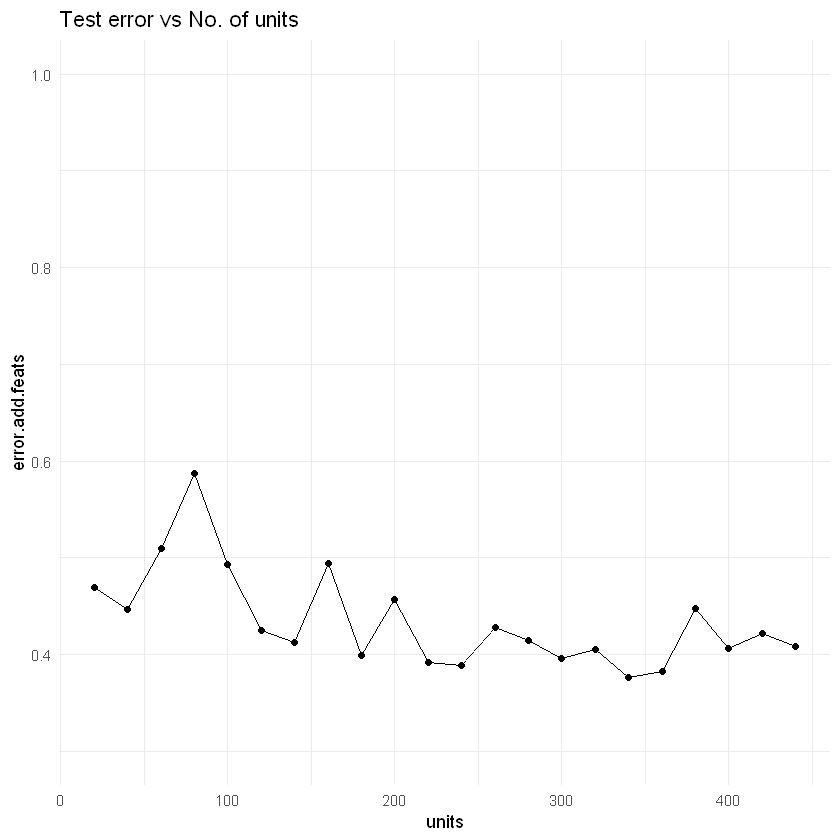

In [11]:
ggplot(data=cls_errors, aes(x=units, y=error.add.feats)) + 
    geom_line() + 
    geom_point() +
    ylim(0.3, 1) +
    ggtitle("Test error vs No. of units") +
    theme_minimal()

6. Plot the error rates for the 3-layer neural networks from Step IV and the augmented self-taught networks from Step V, while the x-axis is the number of hidden neurons and y-axis is the classification error. Save and attach the plot to your PDF report. In your pdf, explain how the performance of the 3-layer neural networks and the augmented self-taught networks is different and why they are different or why they are not different, based on the plot.

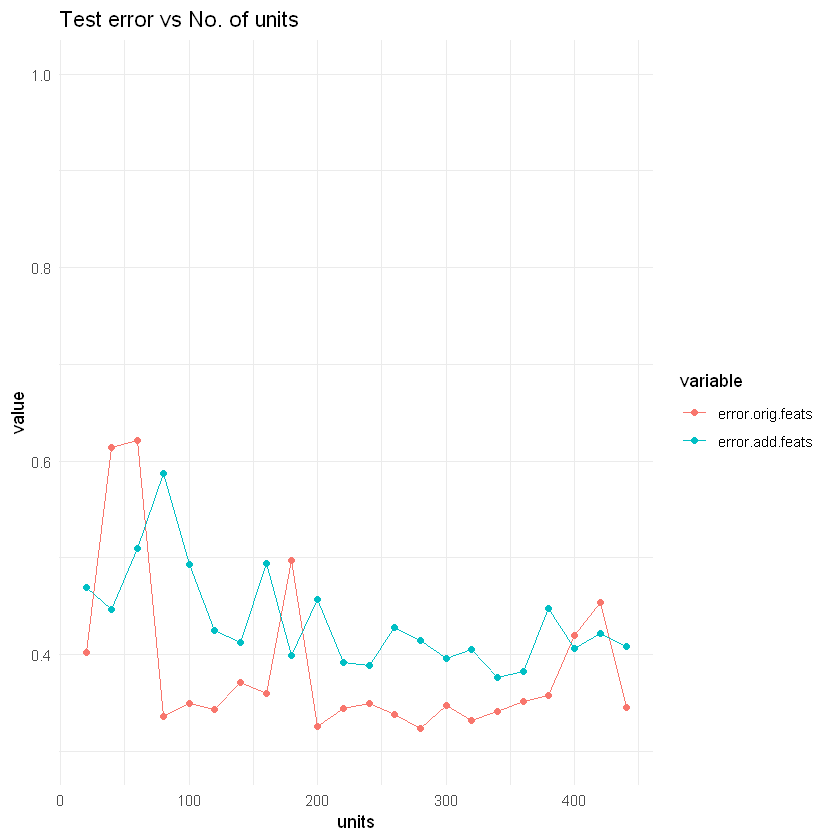

In [12]:
errors.m = melt(cls_errors, id="units")

ggplot(data=errors.m, aes(x=units, y=value, color=variable)) + 
    geom_line() + 
    geom_point() +
    ylim(0.3, 1) +
    ggtitle("Test error vs No. of units") +
    theme_minimal()